In [1]:
import gc,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the train dataset
train=pd.read_csv('C:/Users/Sai Kishore/Desktop/train.csv')

In [3]:
#Loading the test dataset
test=pd.read_csv('C:/Users/Sai Kishore/Desktop/test.csv')

In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
#checking the number of rows and columns of the train and test dataset
train.shape,test.shape

((200000, 202), (200000, 201))

In [7]:
#checking for null values in train dataset
train.isnull().sum().sum()

0

In [8]:
#checking for null values in test dataset
test.isnull().sum().sum()

0

In [9]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [12]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

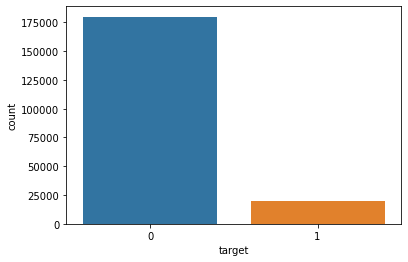

In [13]:
sns.countplot(train.target)

<AxesSubplot:>

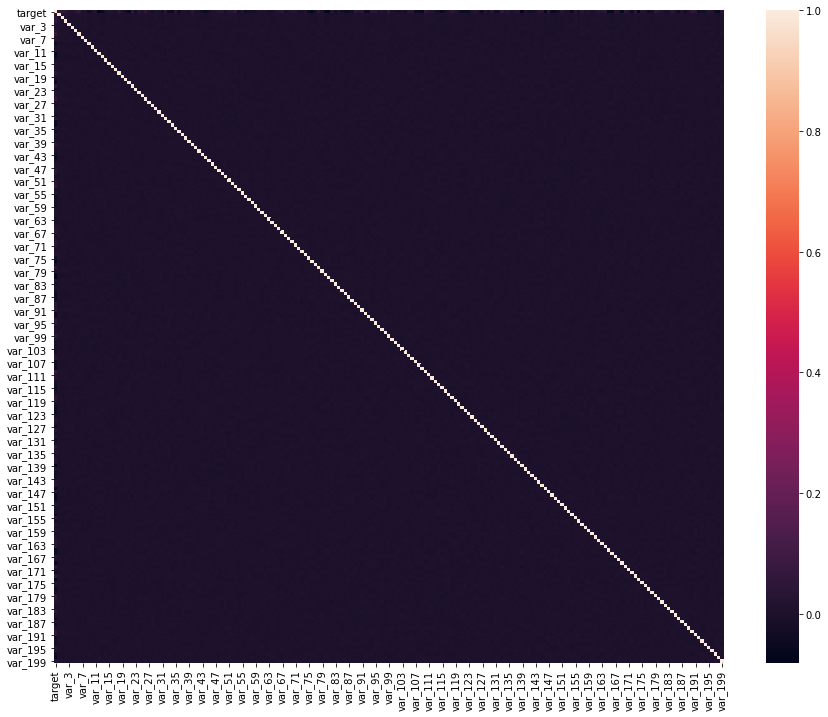

In [14]:
htmap=train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(htmap)

In [15]:
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

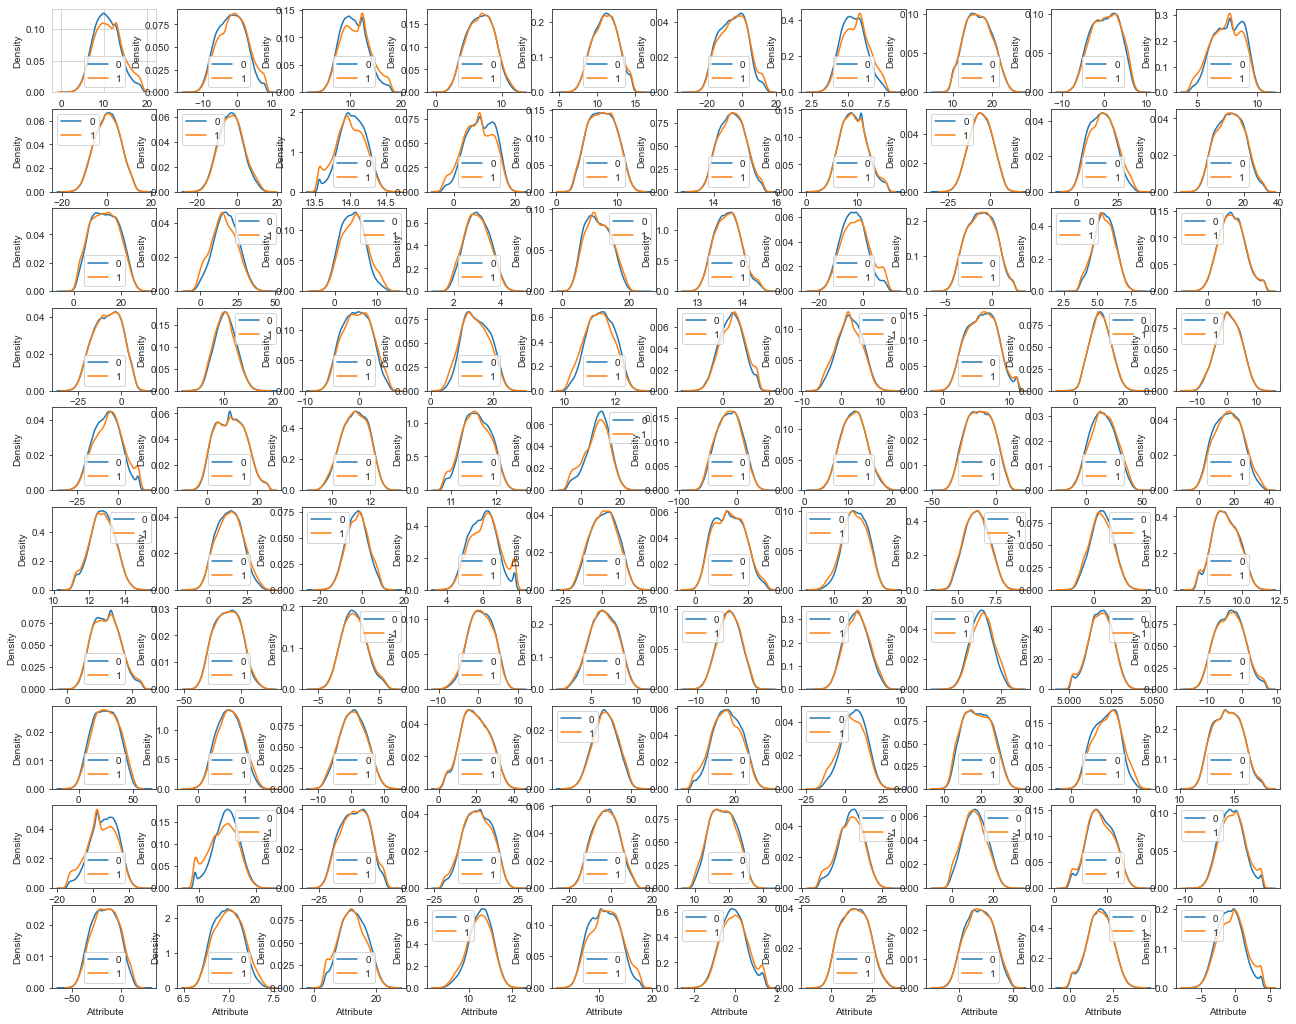

In [16]:
#corresponding to negative class
t0=train[train.target.values==0]
#corresponding to positive class
t1=train[train.target.values==1]
#train attributes from 2 to 102
train_attributes=train.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

<Figure size 432x288 with 0 Axes>

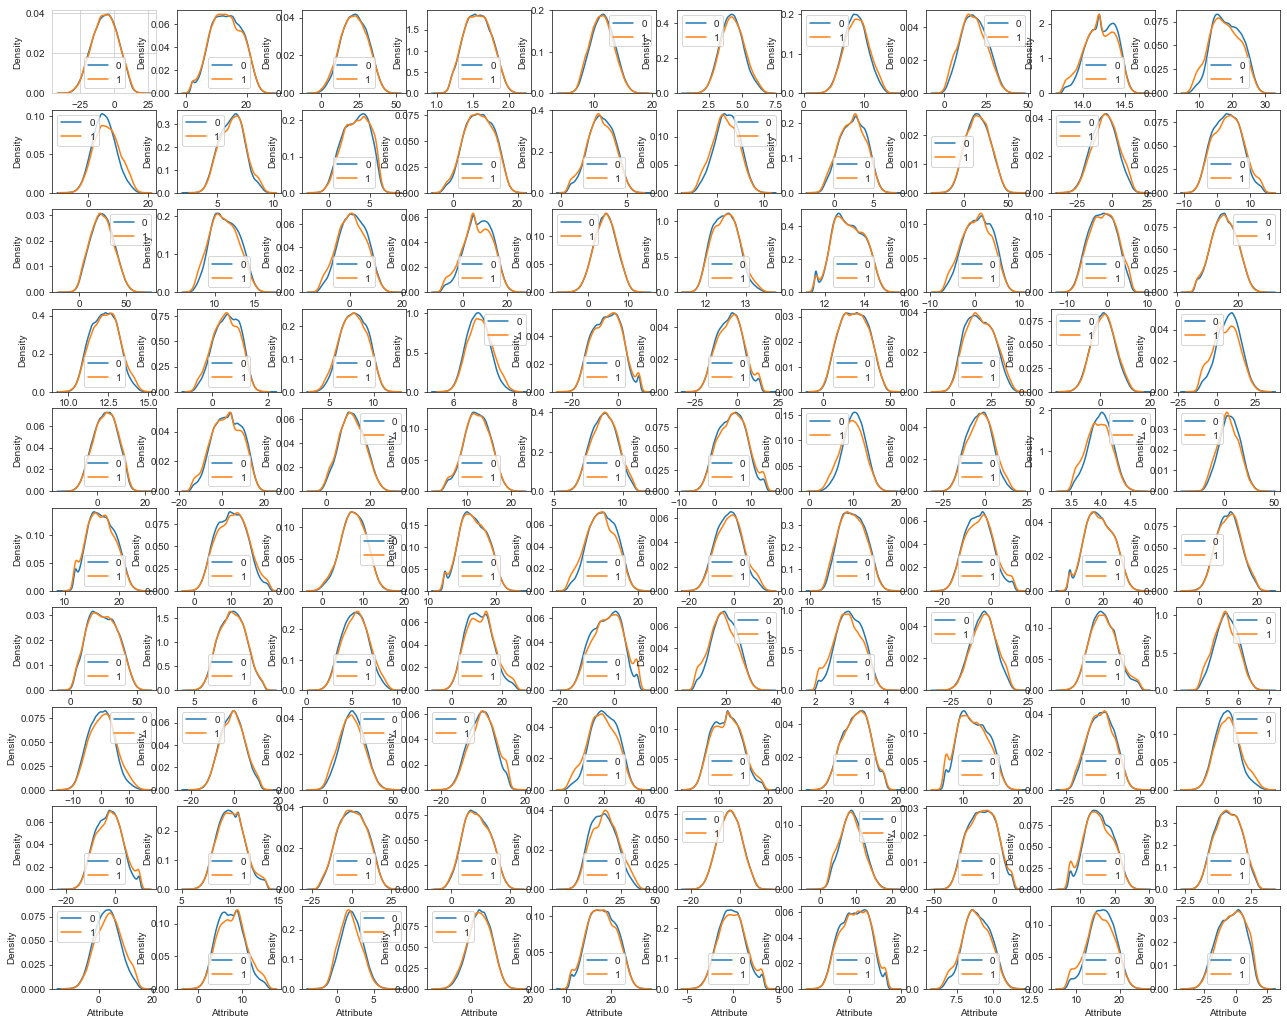

In [17]:
#train attributes from 102 to 203
train_attributes=train.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

We can observed that their is a considerable number of features which are significantly have different distributions for two target variables. For example like var_0,var_1,var_9,var_198 var_180 etc.
We can observed that their is a considerable number of features which are significantly have same distributions for two target variables. For example like var_3,var_7,var_10,var_171,var_185 etc.

In [18]:
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

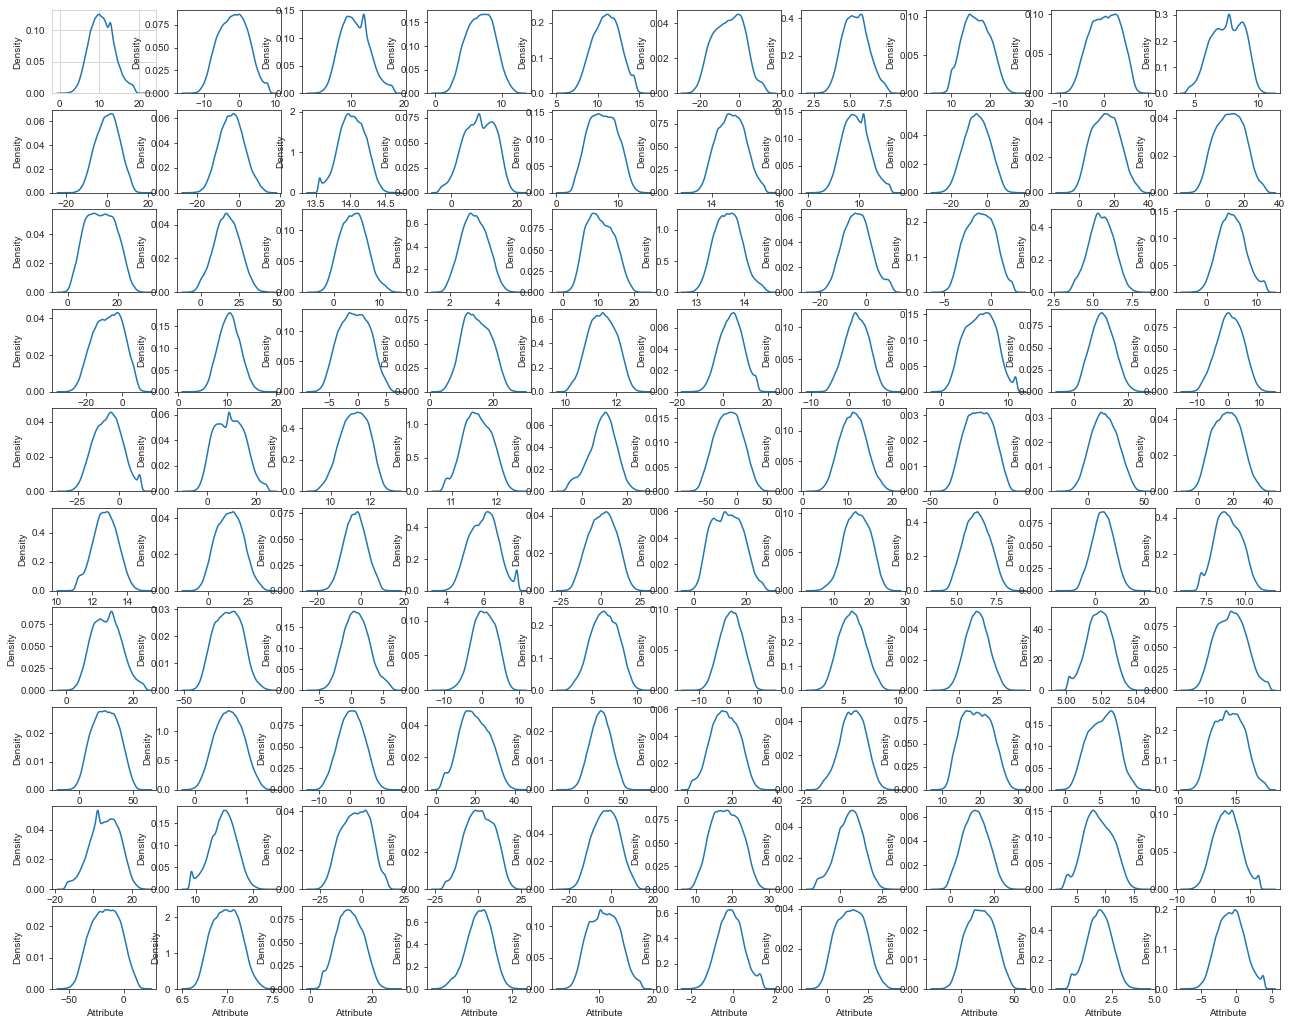

In [19]:
#test attribiutes from 1 to 101
test_attributes=test.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

<Figure size 432x288 with 0 Axes>

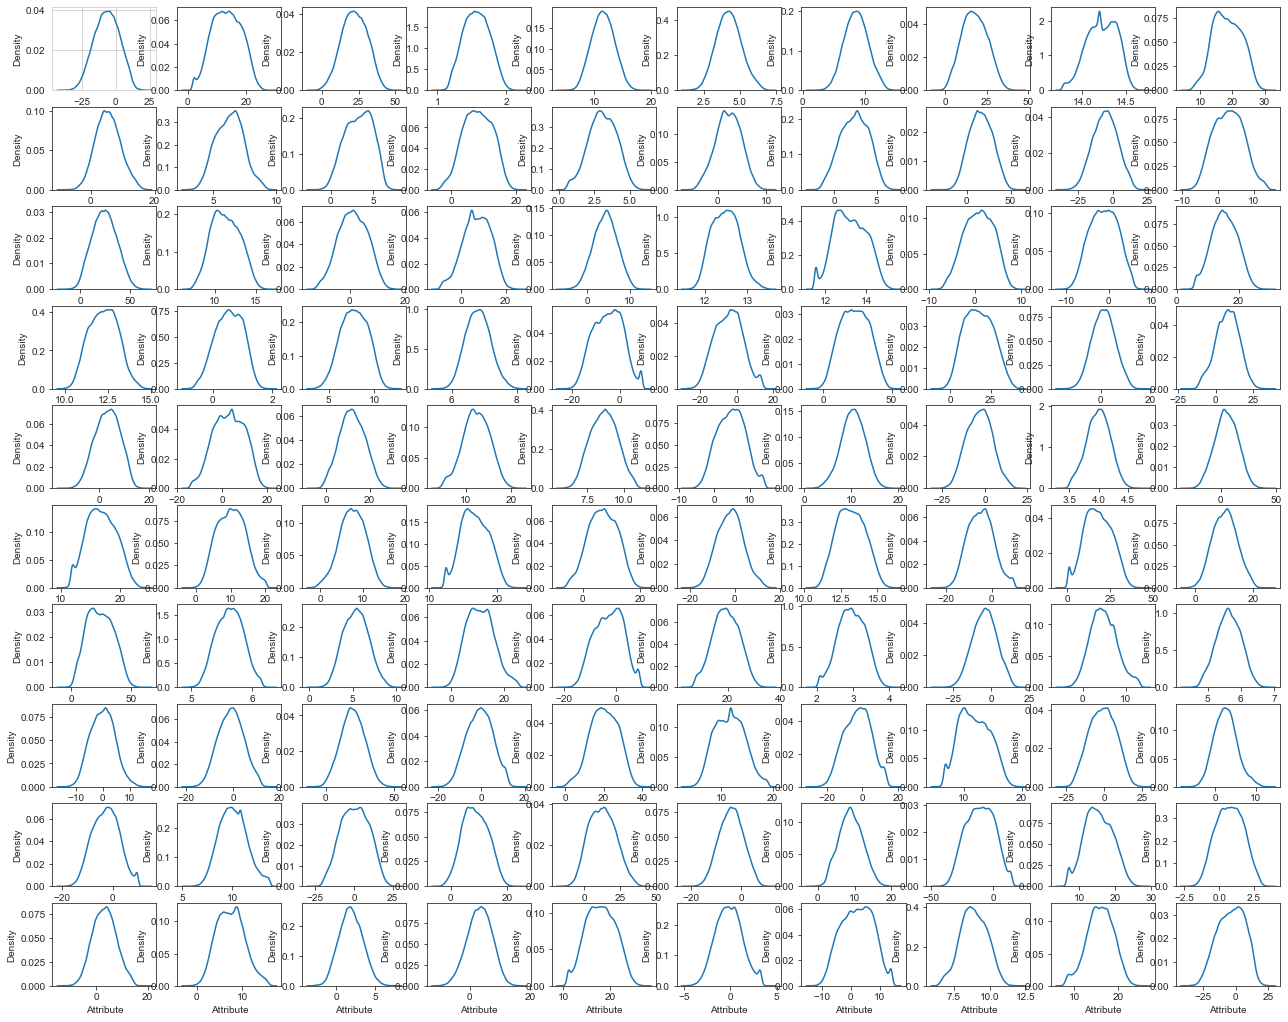

In [20]:
#test attributes from 101 to 202
test_attributes=test.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)

We can observed that their is a considerable number of features which are significantly have different distributions. For example like var_0,var_1,var_9,var_180 var_198 etc.
We can observed that their is a considerable number of features which are significantly have same distributions. For example like var_3,var_7,var_10,var_171,var_185,var_192 etc

# Distribution of mean values per row in the train and test set

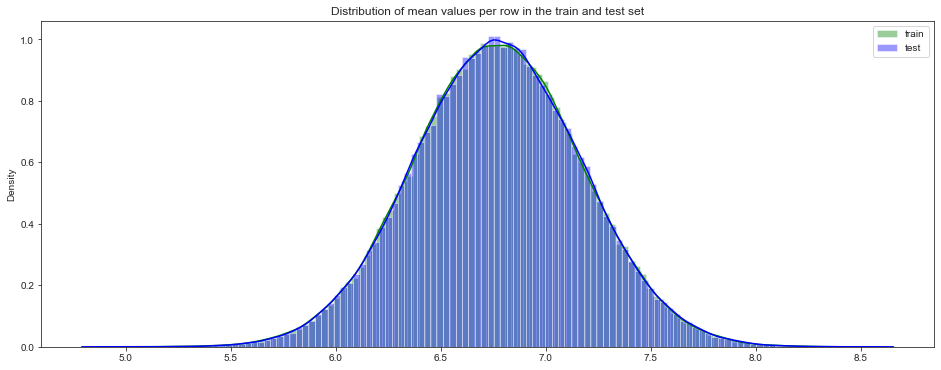

In [21]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of mean values per column in the train and test set

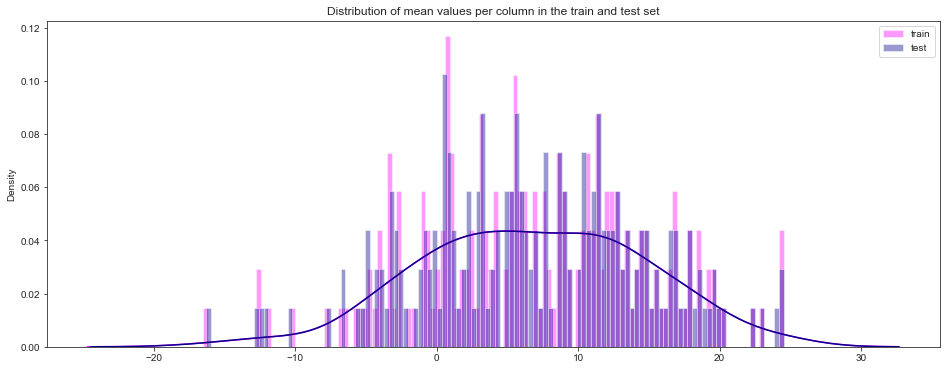

In [22]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of std values per row in the train and test set

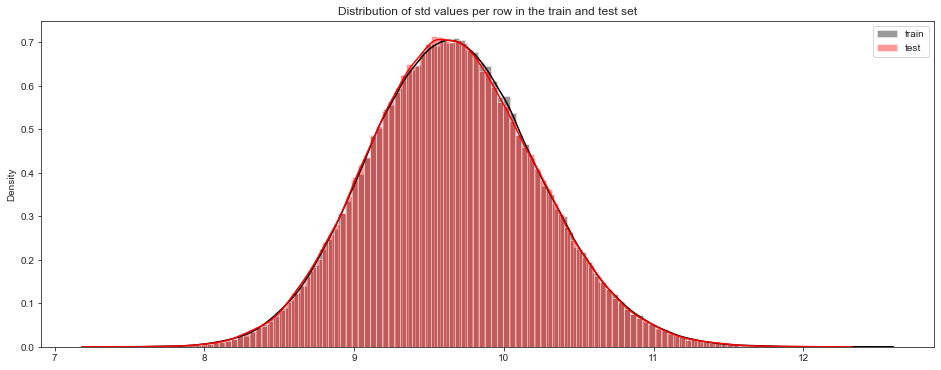

In [23]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of std values per column in the train and test set

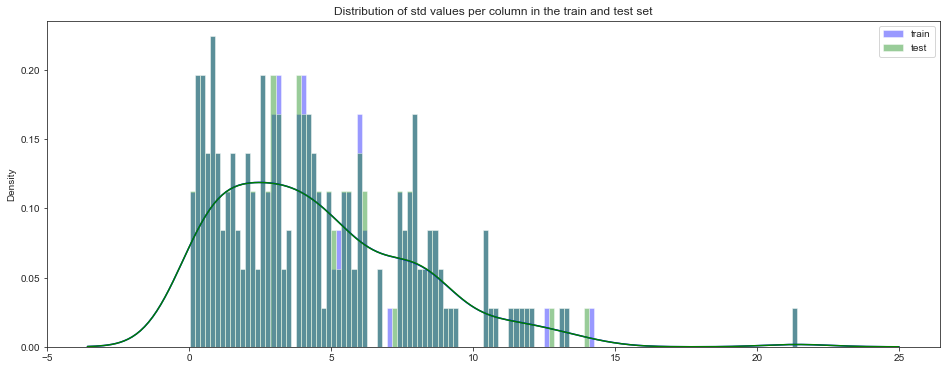

In [24]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of mean values per row in the train set

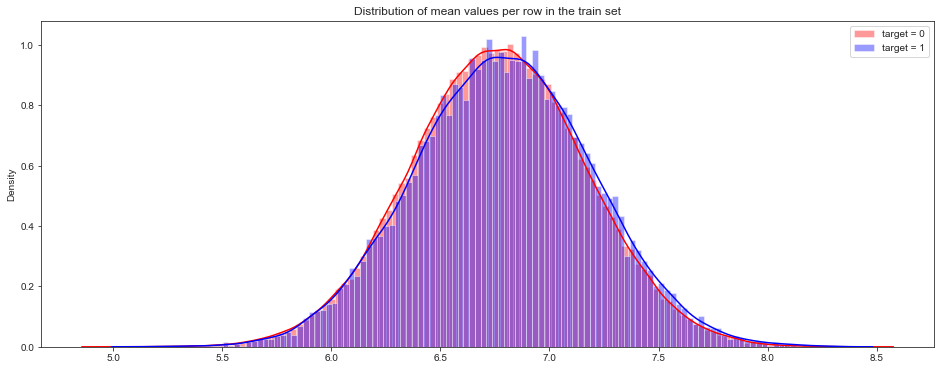

In [25]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

# Distribution of mean values per column in the train set

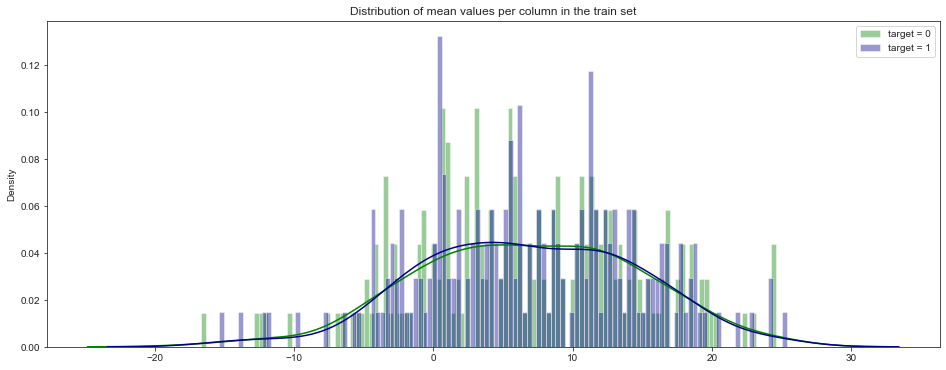

In [26]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

# Distribution of min values per row in the train and test set

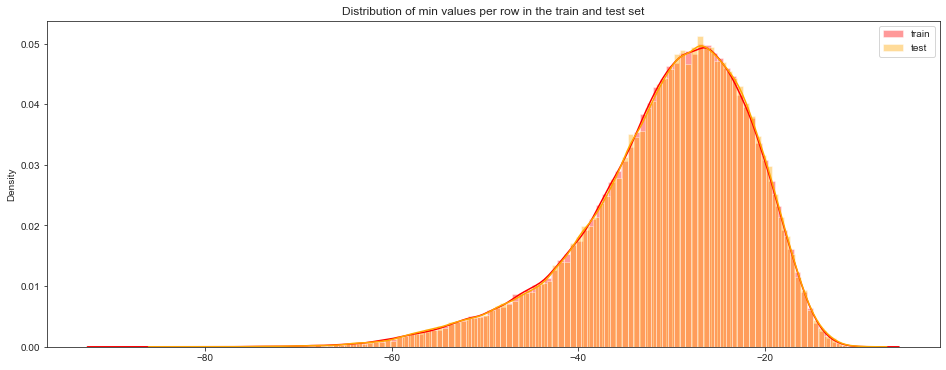

In [27]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of min values per column in the train and test set

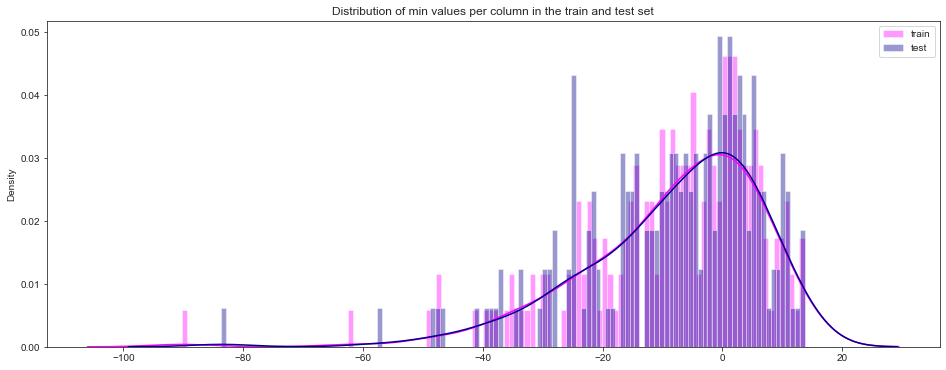

In [28]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of max values per row in the train and test set

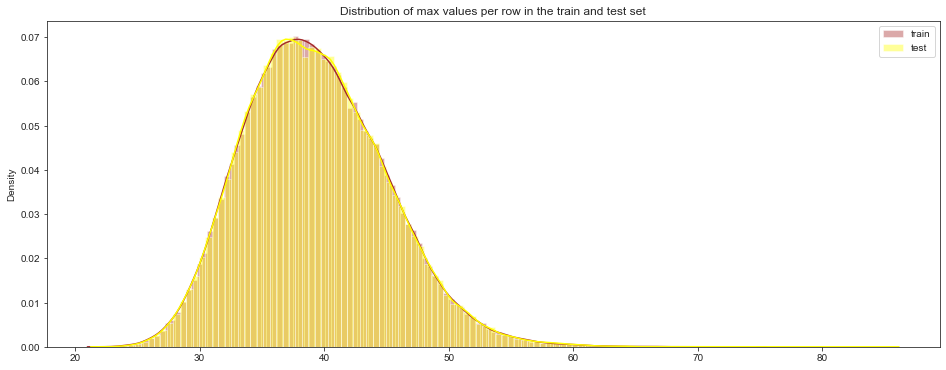

In [29]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of max values per column in the train and test set

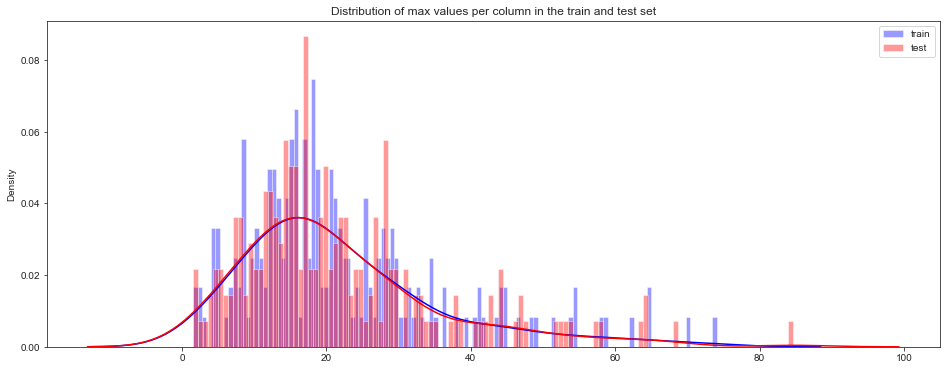

In [30]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of min values per row in the train set

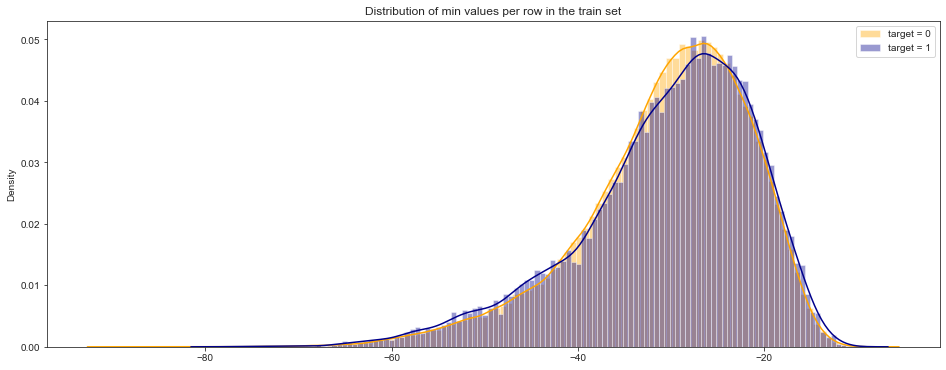

In [31]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()

# Distribution of min values per column in the train set

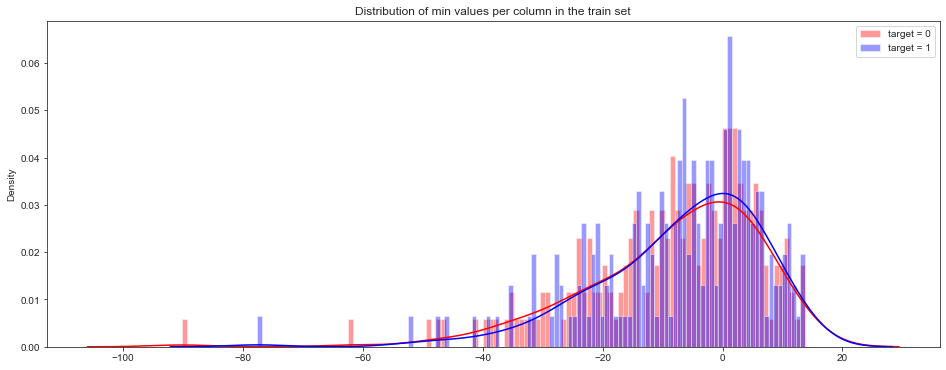

In [32]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column in the train set")
sns.distplot(t0[features].min(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()

# Distribution of max values per row in the train set

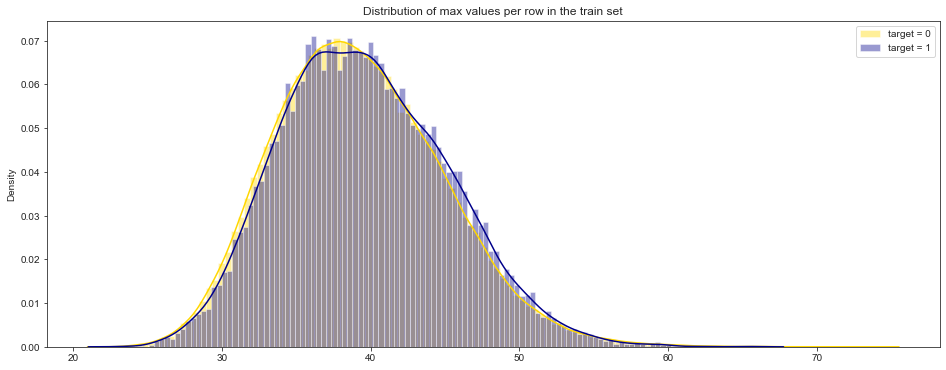

In [33]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train set")
sns.distplot(t0[features].max(axis=1),color="gold", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()

# Distribution of max values per column in the train set

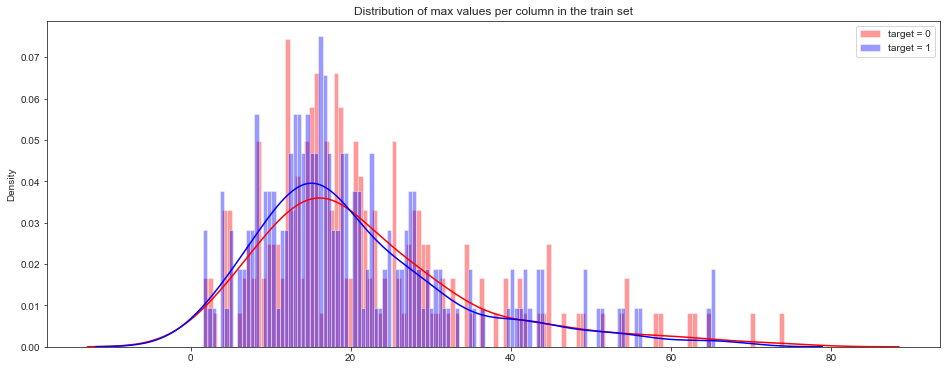

In [34]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per column in the train set")
sns.distplot(t0[features].max(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].max(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()

# Distribution of skew per row in the train and test set

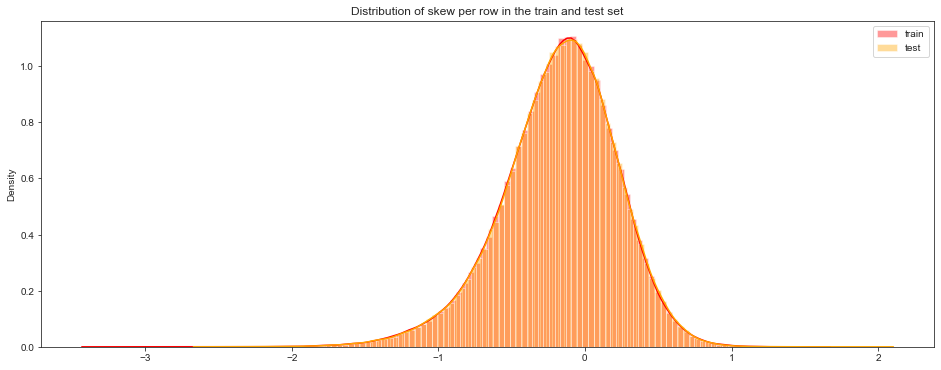

In [35]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train[features].skew(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Distribution of skew per column in the train and test set

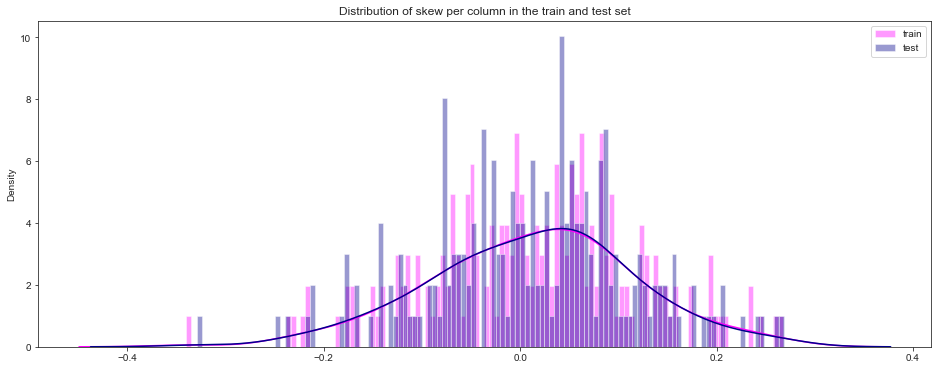

In [36]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Correlation

In [37]:
train.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


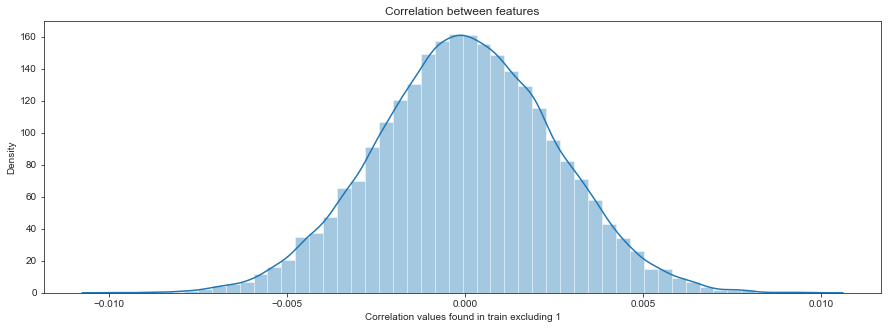

In [38]:
train_cor = train.drop(["target"], axis=1).corr()
train_cor = train_cor.values.flatten()
train_cor = train_cor[train_cor != 1]
plt.figure(figsize=(15,5))
sns.distplot(train_cor)
plt.xlabel("Correlation values found in train excluding 1")
plt.ylabel("Density")
plt.title("Correlation between features")
plt.show()

Thus, we can conclude that there is no correlation in train dataset.

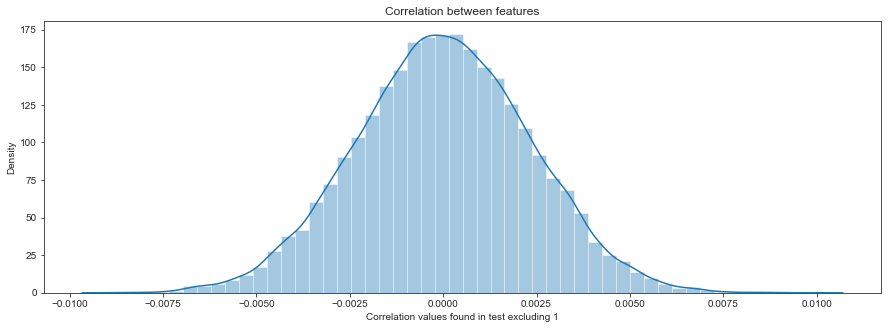

In [39]:
test_cor = test.corr()
test_cor = test_cor.values.flatten()
test_cor = test_cor[test_cor != 1]
plt.figure(figsize=(15,5))
sns.distplot(test_cor)
plt.xlabel("Correlation values found in test excluding 1")
plt.ylabel("Density")
plt.title("Correlation between features")
plt.show()

Thus, we can conclude that there is no correlation in test dataset

# Classification Model Testing and Training

In [40]:
#from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [41]:
# Target variable from the Training Set
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)

In [42]:
# Split the Train Dataset into training and validation sets for model building. 
# The training set now has 140K records and validation set has 60K records

X_train, X_test, Y_train, Y_test = train_test_split(train_inp, Target,test_size= 0.3, random_state = 42)

In [43]:
# check the split of train and validation
print('Train:',X_train.shape)
print('Test:',X_test.shape)

Train: (140000, 200)
Test: (60000, 200)


# Logistic Regression

We start with most basic algorithm used for classification problems. Since this is an unbalanced dataset, we need to define another paramenter 'class_weight = balanced' which will give equal weights to both the targets irrespective of their reperesentation in the training dataset. We can even define classwise weights using this parameter, if needed

In [44]:
# Create an object of Logistic Regression with parameters C and class_weight
logist = LogisticRegression(C=0.001, class_weight='balanced')

# Fit the training data on this object
logist.fit(X_train, Y_train)

LogisticRegression(C=0.001, class_weight='balanced')

In [45]:
# Predict the Target for validation dataset 
logist_pred = logist.predict_proba(X_test)[:,1]

Performance Function :
Since we will be building multiple models, it is advisable to create a function that can be called with different outputs of each model. This is a simple function which takes in the Predicted Validation Target and Actual Validation Target. It then gives out classification summary like confusion matrix and AUC score

In [46]:
def performance(Y_test, logist_pred):
    model_pred_var = [0 if i < 0.5 else 1 for i in logist_pred]
    
    print('Confusion Matrix:')
    plt.figure()
    cm = confusion_matrix(Y_test, model_pred_var)
    labels = ['0', '1']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    #print(confusion_matrix(Y_test, model_pred_var)) 
    
    print('Test accuracy is {}'.format(accuracy_score(Y_test, model_pred_var)))  
    print(metrics.classification_report(Y_test, model_pred_var)) 

    fpr, tpr, thresholds = roc_curve(Y_test, logist_pred, pos_label=1)
    print('AUC:')
    print(auc(fpr, tpr))

Confusion Matrix:


<Figure size 432x288 with 0 Axes>

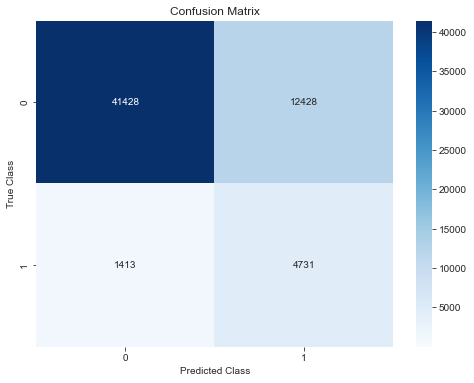

Test accuracy is 0.7693166666666666
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     53856
           1       0.28      0.77      0.41      6144

    accuracy                           0.77     60000
   macro avg       0.62      0.77      0.63     60000
weighted avg       0.90      0.77      0.81     60000

AUC:
0.8495732362399268


In [47]:
import sklearn.metrics as metrics
performance(Y_test, logist_pred)

ROC score : 0.8495732362399268


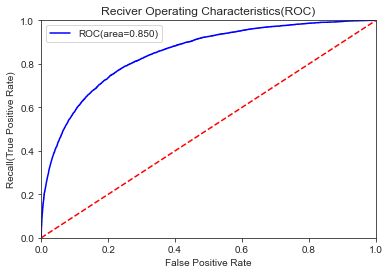

AUC: 0.8495732362399268


In [48]:
#ROC_AUC score
roc_score=roc_auc_score(Y_test, logist_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test, logist_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [49]:
# Submission dataframe
logist_pred_test = logist.predict_proba(test_inp)[:,1]
logist_pred_test[logist_pred_test>=0.5] = 1
logist_pred_test[logist_pred_test<0.5] = 0
submit = test[['ID_code']]
submit['target'] = logist_pred_test

submit.head()

,ID_code,target
0,test_0,1.0
1,test_1,1.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0


# Decision Tree

Moving on to a slightly advanced algorithm, decision trees. Again, the parameters here are class_weight to deal with unbalanced target variable, random_state for reproducability of same trees. The feature max_features and min_sample_leaf are used to prune the tree and avoid overfitting to the training data.

Max_features defines what proportion of available input features will be used to create tree.

Min_sample_leaf restricts the minimum number of samples in a leaf node, making sure none of the leaf nodes has less than 80 samples in it. If leaf nodes have less samples it implies we have grown the tree too much and trying to predict each sample very precisely, thus leading to overfitting

In [50]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree Classifier object with few parameters
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 42, 
                                  max_features = 0.7, min_samples_leaf = 80)

# Fit the object on training data
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_features=0.7,
                       min_samples_leaf=80, random_state=42)

Confusion Matrix:


<Figure size 432x288 with 0 Axes>

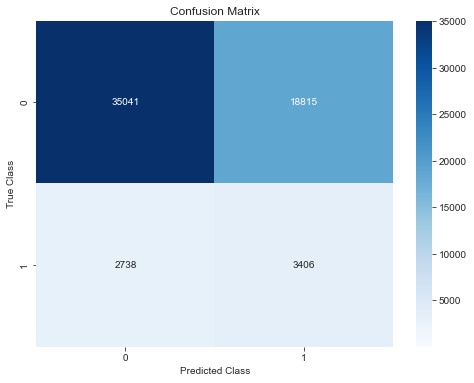

Test accuracy is 0.6407833333333334
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     53856
           1       0.15      0.55      0.24      6144

    accuracy                           0.64     60000
   macro avg       0.54      0.60      0.50     60000
weighted avg       0.85      0.64      0.71     60000

AUC:
0.6447084607830565


In [51]:
# Predict for validation set and check the performance
tree_preds = tree_clf.predict_proba(X_test)[:, 1]
performance(Y_test, tree_preds)

ROC score : 0.6447084607830565


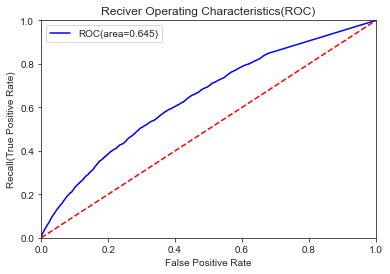

AUC: 0.6447084607830565


In [52]:
#ROC_AUC score
roc_score=roc_auc_score(Y_test, tree_preds)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test, tree_preds)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [53]:
# Submission dataframe
tree_pred_test = tree_clf.predict_proba(test_inp)[:, 1]
tree_pred_test[tree_pred_test>=0.5] = 1
tree_pred_test[tree_pred_test<0.5] = 0
submitTree = test[['ID_code']]
submitTree['target'] = tree_pred_test
submitTree.head()

,ID_code,target
0,test_0,1.0
1,test_1,0.0
2,test_2,1.0
3,test_3,0.0
4,test_4,1.0


In [54]:
# Extract feature importances
feature_importance_values = tree_clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

,feature,importance
81,var_81,0.064559
139,var_139,0.046683
12,var_12,0.041017
26,var_26,0.029449
53,var_53,0.025763
6,var_6,0.023627
110,var_110,0.022669
174,var_174,0.021277
22,var_22,0.019442
166,var_166,0.017707


# RandomForest

Let's start with building a random forest, with parameters like class_weight, random_state, and hyperparameters like max_features and min_sample_leaf as earlier. We have also defined the n_estimators which is a compulsory parameter. This defines the number of decision trees that will be present in the forest.

In [55]:
# Create random Forest Object using the mentioned parameters
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1,
                                      class_weight='balanced', max_features = 0.5, 
                                       min_samples_leaf = 100)

# Fit the object on training set 
random_forest.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 41.6min finished


RandomForestClassifier(class_weight='balanced', max_features=0.5,
                       min_samples_leaf=100, random_state=2019, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


Confusion Matrix:


<Figure size 432x288 with 0 Axes>

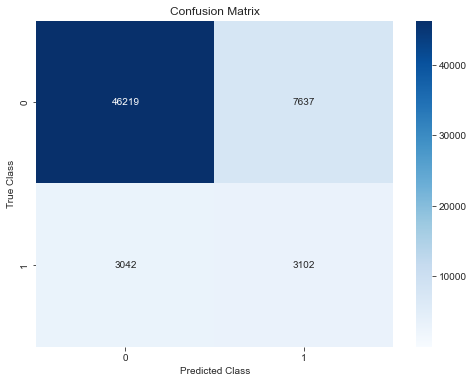

Test accuracy is 0.8220166666666666
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     53856
           1       0.29      0.50      0.37      6144

    accuracy                           0.82     60000
   macro avg       0.61      0.68      0.63     60000
weighted avg       0.87      0.82      0.84     60000

AUC:
0.7844470774544232


In [56]:
# Predict the validation set target and check the performance
forest_preds = random_forest.predict_proba(X_test)[:, 1]
performance(Y_test, forest_preds)

ROC score : 0.7844470774544232


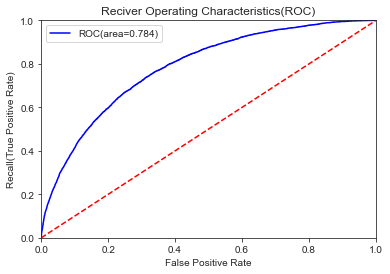

AUC: 0.7844470774544232


In [57]:
#ROC_AUC score
roc_score=roc_auc_score(Y_test, forest_preds)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test, forest_preds)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [58]:
# Submission dataframe
forest_pred_test = random_forest.predict_proba(test_inp)[:, 1]

forest_pred_test[forest_pred_test>=0.5] = 1
forest_pred_test[forest_pred_test<0.5] = 0
submitForest = test[['ID_code']]
submitForest['target'] = forest_pred_test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.6s finished


In [59]:
submitForest.head()

,ID_code,target
0,test_0,1.0
1,test_1,0.0
2,test_2,1.0
3,test_3,0.0
4,test_4,0.0


In [60]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

,feature,importance
81,var_81,0.066097
139,var_139,0.046198
12,var_12,0.041546
6,var_6,0.029458
26,var_26,0.027117
53,var_53,0.024308
110,var_110,0.023477
22,var_22,0.022221
146,var_146,0.020542
174,var_174,0.020238


# Light Gradient Boosting Method

Light GBM is a gradient boosting framework that uses tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

WHY USE LGB?

It is ‘Light’ because of its high speed. It can handle large data, requires low memory to run and focuses on accuracy of results and also supports GPU learning.

In [61]:
params = {      'learning_rate': 0.01,
                'max_depth': -1,
                'num_leaves': 12,
                'feature_fraction': 0.1,
                'subsample': 0.2,
                'objective': 'binary',
                 'metric': 'auc',
                 'is_unbalance': True,
                 'bagging_freq': 5,
                 'boosting': 'gbdt' }

In [62]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3, shuffle = False)

oof = np.zeros(len(train))
#predictions = np.zeros(len(test))

for fold_, (idxT, idxV) in enumerate(folds.split(train.values, Target.values)):
    print("Fold {}".format(fold_))
    
    X_train = train.iloc[idxT][features]
    y_train = Target.iloc[idxT] 
    X_val =   train.iloc[idxV][features] 
    y_val = Target.iloc[idxV]
        
    train_data = lgb.Dataset(X_train, y_train)
    val_data   = lgb.Dataset(X_val, y_val)
    
    clf = lgb.train(params =  params ,                    
                    train_set = train_data, 
                    valid_sets = [train_data, val_data], 
                    num_boost_round = 20000,
                    verbose_eval = 1000, 
                    early_stopping_rounds = 5000)
    
    oof[idxV] = clf.predict(X_val, num_iteration=clf.best_iteration)
    
print("CV score: {:<8.5f}".format(roc_auc_score(Target, oof)))   

Fold 0
[LightGBM] [Info] Number of positive: 13399, number of negative: 119934
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.402375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 133333, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100493 -> initscore=-2.191762
[LightGBM] [Info] Start training from score -2.191762
Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.896281	valid_1's auc: 0.870435
[2000]	training's auc: 0.9159	valid_1's auc: 0.884992
[3000]	training's auc: 0.926635	valid_1's auc: 0.890327
[4000]	training's auc: 0.934651	valid_1's auc: 0.892736
[5000]	training's auc: 0.941542	valid_1's auc: 0.893546
[6000]	training's auc: 0.947645	valid_1's auc: 0.893784
[7000]	training's auc: 0.953176	valid_1's auc: 0.894052
[8000]	training's auc: 0.95807	valid_1'

In [63]:
lgbm_predict=np.where(oof[idxV]>=0.5,1,0)

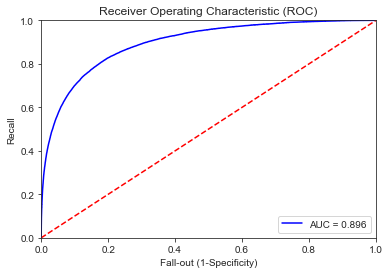

In [64]:
#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(Target, oof)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

In [65]:
lgb_pred2 = np.zeros(len(oof))

In [66]:
for i in range(0,len(oof)):
    if oof[i]>=.5:     
       lgb_pred2[i]=1
    else:  
       lgb_pred2[i]=0

In [67]:
lgb_acu=accuracy_score(lgb_pred2,Target)
lgb_pre=precision_score(lgb_pred2, Target)
lgb_rec=recall_score(lgb_pred2,Target)
lgb_f1=f1_score(lgb_pred2, Target)

print("Accuracy Score for LightGBM is ",lgb_acu)
print("Precision Score for  LightGBM is ",lgb_pre)
print("Recall Score for LightGBM is ",lgb_rec)
print("f1 Score for LightGBM is ",lgb_f1)

Accuracy Score for LightGBM is  0.85419
Precision Score for  LightGBM is  0.7545526918101304
Recall Score for LightGBM is  0.3849571000659999
f1 Score for LightGBM is  0.5098164459086937


<Figure size 432x288 with 0 Axes>

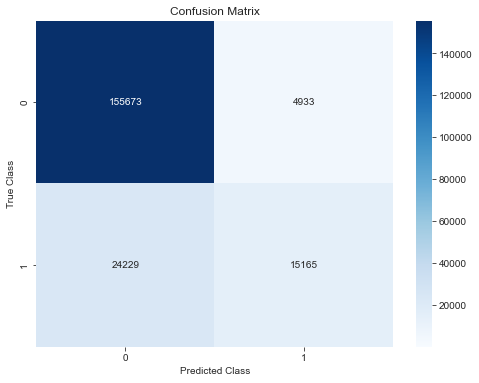

In [68]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(lgb_pred2,Target)
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

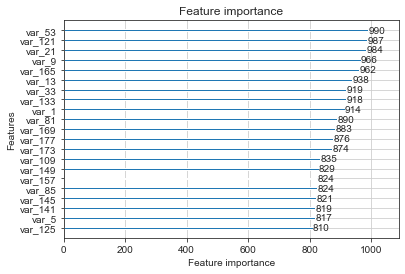

In [70]:
lgb.plot_importance(clf, max_num_features=21, importance_type='split')